# MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits 0 to 9. Each image is of size 28*28 pixels. The images are grayscale, i.e, there is only one channel for images. Images are divided into 10 different classes (digits 0 t0 9). 
It consist of-
- 60000 training images
- 10000 test images
- 28*28 pixels


![Sample image of MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/480px-MnistExamples.png "Sample image of MNIST dataset")

## Importing files

In [1]:
import numpy as np
# import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Gpu support for Tensorflow

In [2]:
physical_devices = tf.config.experimental.list_physical_devices()
physical_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
tf.config.experimental.set_memory_growth(physical_devices[2], True)

## Loading Data

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

## Data Visualization

[]

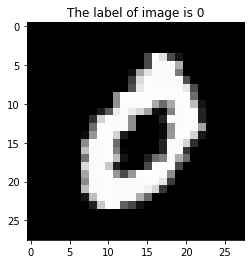

In [6]:
x=37
plt.title("The label of image is "+str(y_train[x]))
plt.imshow(X_train[x], cmap='gray')
plt.plot()

## Flattening and normalizing images
Now for Convolution layers we have to reshape our input into a single tenor. That's because the first convolution
expects a single tensor containing everything, so instead of 60,000 items (size = 28x28x1) in a list, we have a single
4D list that is 60,000x28x28x1.

In [7]:
input_shape = (28,28,1)
X_train = X_train.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
X_test = X_test.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0

## CNN Model building

In [8]:
def My_model(activation = 'relu'):
    
    # Model Building
    model = keras.Sequential([keras.Input(shape=input_shape), #(32,32,3)
                          keras.layers.Conv2D(32, (3,3), padding='valid', activation=activation),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, (3,3), padding='valid', activation=activation),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(128, (3,3), padding='valid', activation=activation),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation=activation),
                          keras.layers.Dense(10, activation='softmax')])
    '''Last layer will have activation as softmax because we are predicting a class out of 10 different classes.
       Using softmax will give us the output scores of the input image as a list of length 10 for 10 different classes,
       each in range (0,1) and the sum of all the 10 will be 1. So it can be considered as probablity of each class.
       The class with max score is considered as the output class of the input image.'''
    
    print(model.summary())
    
    # Compile
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])
    '''In this case we have used the loss function as Sparse-Categorical-Crossentropy because the task is a multicalss
       classification task with 10 classes and the output "y_train" and "y_test" aslo contains the classes in numerical
       form (0 to 9). If it would have been in One Hot Encoded format then the loss function used would be 
       Categorical-Crossentropy.'''
    
    print("*"*20+"Model.fit"+"*"*20)
    # Fit
    model.fit(X_train, y_train, batch_size=32, epochs=5)
    
    print("*"*20+"Model Evaluation"+"*"*20)
    # Evaluate
    eval = model.evaluate(X_test, y_test, batch_size=32)
    
    print("*"*55)
    print(f"The test score of model with {activation} activation function is:", eval[1])
    
    return model

## Trying out the model with different activation functions

### 1. Rectified Linear Unit (ReLU) Activation Function

In [9]:
model_relu = My_model(activation='relu')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

### 2. Tanh or hyperbolic tangent Activation Function

In [10]:
model_tanh = My_model(activation='tanh')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### 3. Linear Activation Function

In [11]:
model_linear = My_model(activation='linear')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### 4. Sigmoid or Logistic Activation Function

In [12]:
model_sigmoid= My_model(activation='sigmoid')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

### 5. Softmax Activation Function

In [13]:
model_softmax = My_model(activation='softmax')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

## Result Matrix

The results of using different activation function are:

| Activation Functions | Train Accuracy | Test Accuracy |
| :------------- | :----------: | -----------: |
| relu | 99.45%   | 98.98% |
| tanh | 98.90% | 98.67% |
| linear | 98.41% | 98.48% |
| sigmoid | 98.92% | 98.68% |
| softmax | 93.90% | 95.01% |

Among all the activation functions, when trained for 5 epochs relu performed the best and softmax performed the worst. So we will be using model_relu to test it on our data

## Test it on our data
- We will use `opencv` library to resize and convert images

In [14]:
import cv2
import glob

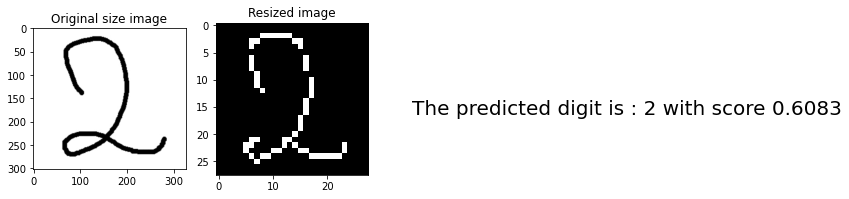

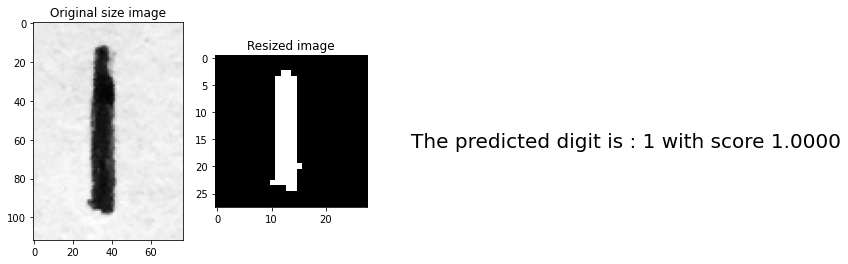

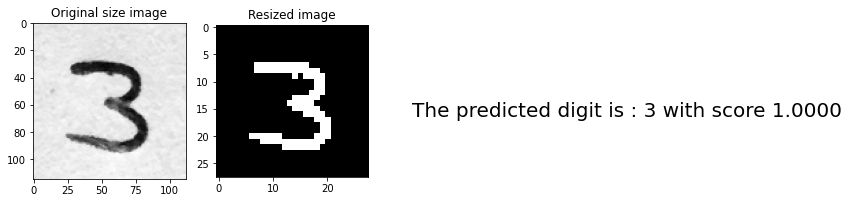

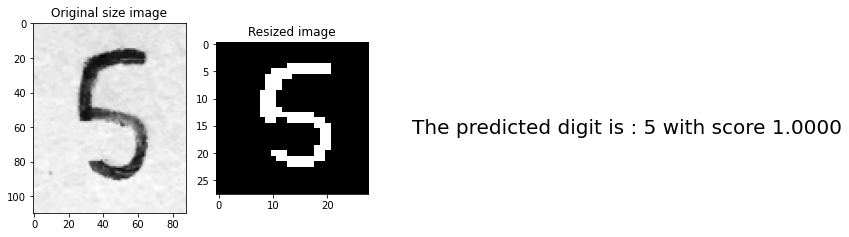

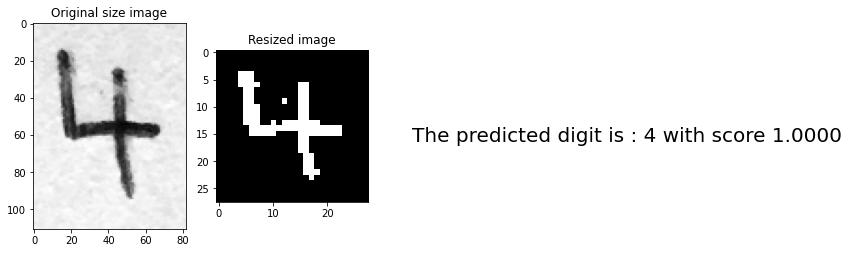

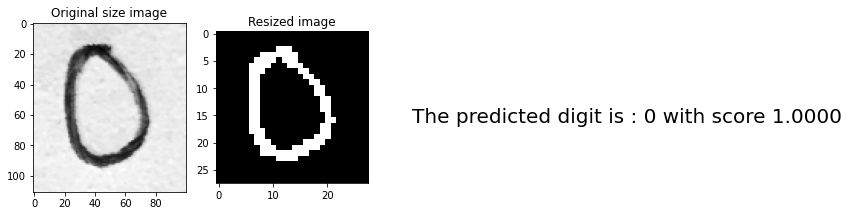

In [15]:
images = [cv2.imread(file, 0) for file in glob.glob("Handwritten_digits_Images\*.png")]
for image in images:
    plt.figure()
    
    #Resizing image to the size of images of trainging dataset(MNIST)
    img = cv2.resize(image, (28,28),)# interpolation=cv2.INTER_LINEAR)
    
    # The images in MNIST data are of binary format where the background is black and the digit is written in white.
    # So we need to convert all of our test images into binary format. The function used is THRESH_BINARY_INV which 
    # will convert the background as black while digit as white pixels.
    ret, binary = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
    
    # Let's plot
    plt.subplot(1, 2, 1), plt.imshow(image, 'gray'), plt.title("Original size image")
    plt.subplot(1, 2, 2), plt.imshow(binary, 'gray'), plt.title("Resized image")
    
    # Converting image into format that can be passed into our model for prediction.
    # This includes flaattenig of image as 1D image, converting as float32 then normalizing by dividing by 255.0
    img = binary.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    
    # Prediction
    result = np.array(model_relu.predict(img).reshape(-1))
    
    # Plotting the result
    format_float = "{:.4f}".format(np.max(result))
    plt.suptitle(f"The predicted digit is : {np.argmax(result)} with score {format_float}", size=20, y=0.5, x=1.5)
plt.show()